In [19]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz 
from typing import Dict, Tuple
from IPython.core.display import display, Image
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline 
sns.set(style="ticks")

/var/folders/f5/r0gs37h504ggbth56zsr1c5c0000gn/T/ipykernel_57437/696814314.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, Image


In [20]:
data = pd.read_csv("drug200.xls", sep=',')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [21]:
for feature in ["Sex", "BP", "Cholesterol", "Drug"]:
    print(feature, ": ", data[feature].unique())

Sex :  ['F' 'M']
BP :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol :  ['HIGH' 'NORMAL']
Drug :  ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [22]:
data_enc = data.copy()

In [23]:
le = LabelEncoder()

le.fit(data["Drug"])
data_enc["Drug"] = le.transform(data["Drug"])

le.fit(data["Sex"])
data_enc["Sex"] = le.transform(data["Sex"])

le.fit(data["BP"])
data_enc["BP"] = le.transform(data["BP"])

le.fit(data["Cholesterol"])
data_enc["Cholesterol"] = le.transform(data["Cholesterol"])

data_enc.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [24]:
for feature in ["Sex", "BP", "Cholesterol", "Drug"]:
    print(feature, ": ", data_enc[feature].unique())

Sex :  [0 1]
BP :  [0 1 2]
Cholesterol :  [0 1]
Drug :  [0 3 4 1 2]


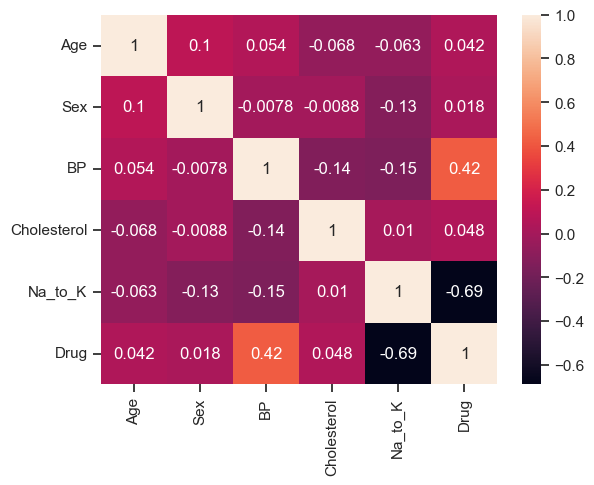

In [25]:
corr = data_enc.corr()
heatmap = sns.heatmap(corr, annot=True)

In [26]:
data_X = data_enc.drop("Drug", axis=1)
data_y = data_enc["Drug"]

In [27]:
def type_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    labels, counts = np.unique(array, return_counts=True)
    counts_perc = counts/array.size
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_type_proportions(array: np.ndarray):
    proportions = type_proportions(array)
    if len(proportions)>0:
        print('Тип \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))
print_type_proportions(data_y)

Тип 	 Количество 	 Процент встречаемости
0 	 91 	 	 45.5%
1 	 23 	 	 11.5%
2 	 16 	 	 8.0%
3 	 16 	 	 8.0%
4 	 54 	 	 27.0%


In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=1, stratify=data_y)

# Бэггинг

In [29]:
bc1 = BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)
bc1.fit(X_train, y_train)

/Users/aleksej/Projects/tmo/.venv/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/aleksej/Projects/tmo/.venv/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)

In [30]:
# Какие объекты были использованы в обучающей выборке каждого дерева
bc1.estimators_samples_

[array([137, 103, 142, 138,  26, 152, 138,  50, 126,  67,  34,  24,  43,
        149,  58, 112, 118, 104,  46, 104,  27,  74, 147,  37,  45, 132,
         44, 142,  69, 156,  74,  23, 108,  64,   0,  50, 150,  78,  42,
        112,  77, 156,  50,   4, 114,  14,  56, 105,  43,  39,  43, 139,
         80, 127, 159, 116,  56,  54, 110, 138, 136,   4,  79,  62,  44,
         60, 111,  74, 153, 114, 125, 137, 102, 153,  88,  14, 130, 107,
        110, 118,  41, 151,  62,  66,  37,  14,  52, 120, 117,  68,  73,
         39, 104,  92, 150,  44, 139,  22,  66, 107,  27, 153,  85,  54,
         40, 146,  95,  38,  92,  97,  61, 116,  73, 116,  68,  48,  20,
        124,  82,  37,  58, 101,   7, 123, 141, 146,  38, 116, 105,  91,
          7,   0, 131,   3,  22,  59, 133,  20, 106, 123,  11, 121,  66,
         18,  46,  52, 147,  62,  89,  86,  37, 115, 132,  38,  90,  84,
         86,  25,  48,  77]),
 array([ 95,  46,  93, 129,  44, 136,  87, 149,  61,  68,  87, 102,  31,
         34,  17,  58

In [31]:
# Сконвертируем эти данные в двоичную матрицу, 
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, X_train.shape[0]))
for i in range(5):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,

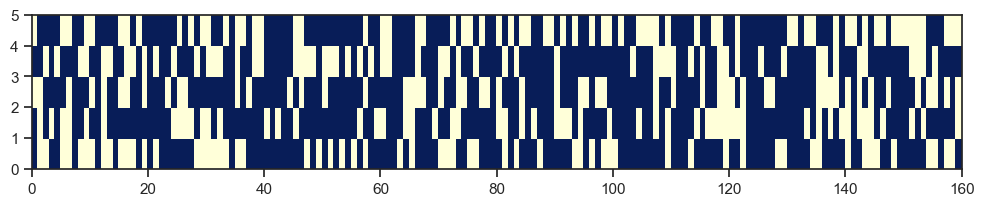

In [32]:
# И визуализируем (синим цветом показаны данные, которые попали в обучающую выборку)
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [33]:
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 38.12%
Для модели № 2 размер OOB составляет 35.0%
Для модели № 3 размер OOB составляет 34.38%
Для модели № 4 размер OOB составляет 36.88%
Для модели № 5 размер OOB составляет 42.5%


In [34]:
bc1.oob_score_, 1-bc1.oob_score_

(0.925, 0.07499999999999996)

In [35]:
# Параметр oob_decision_function_ возвращает вероятности 
# принадлежности объекта к классам на основе oob
# значения nan могут возвращаться в случае маленькой выборки
bc1.oob_decision_function_[55:70]

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [nan, nan, nan, nan, nan],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [nan, nan, nan, nan, nan],
       [ 0.,  1.,  0.,  0.,  0.]])

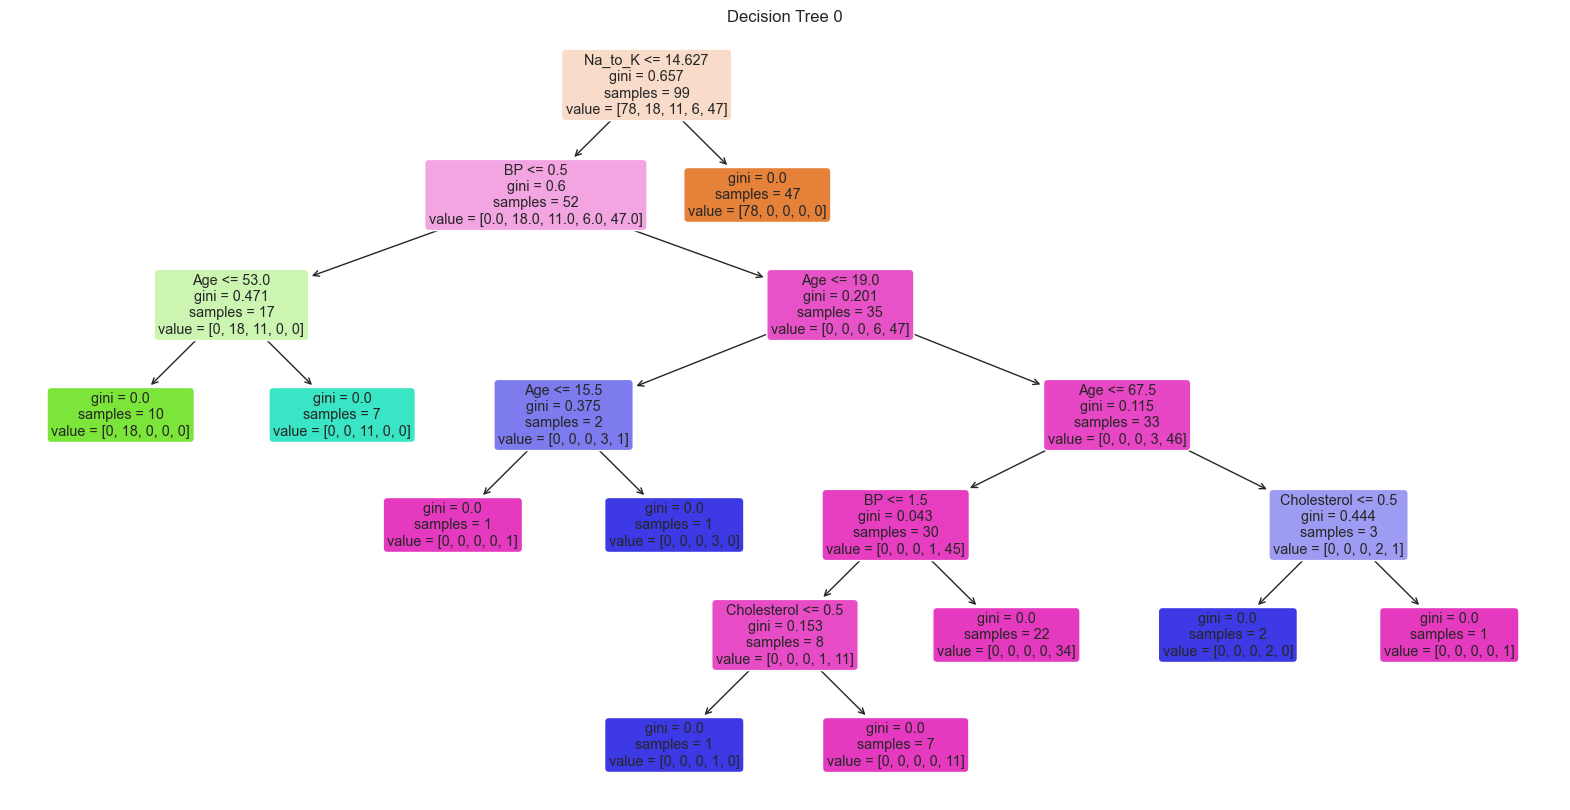

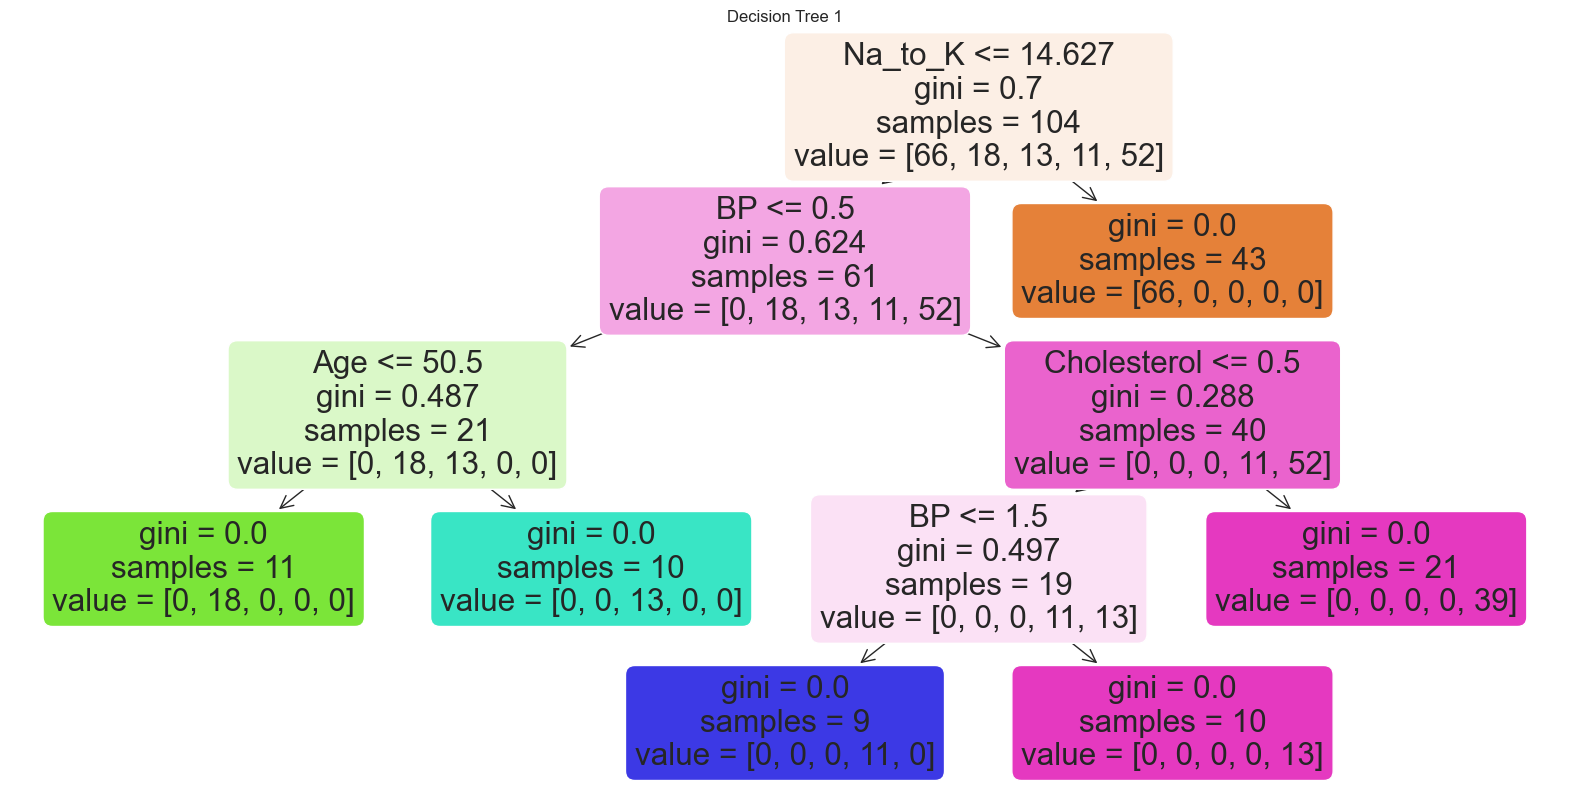

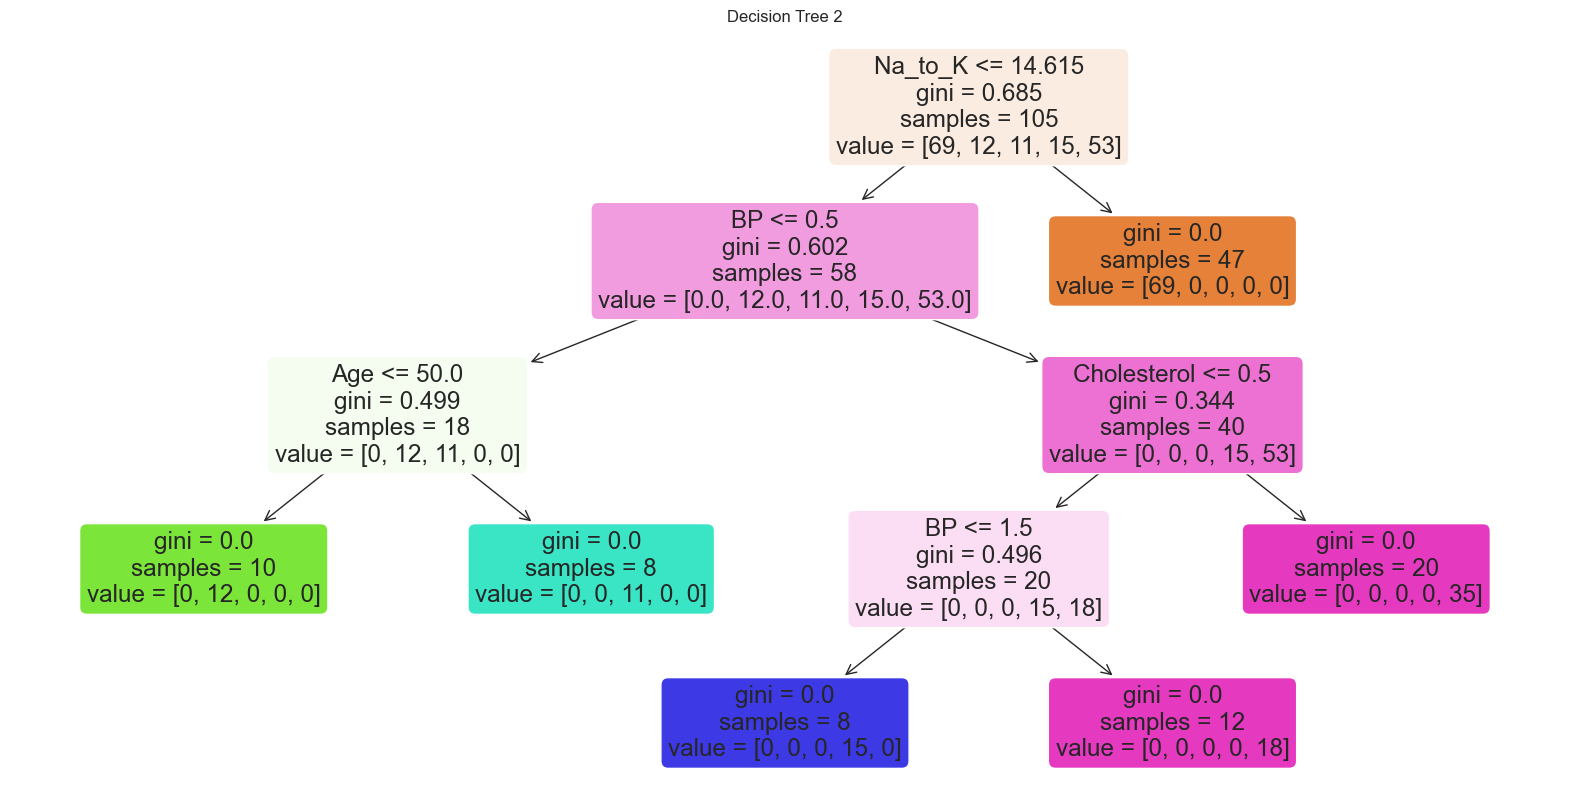

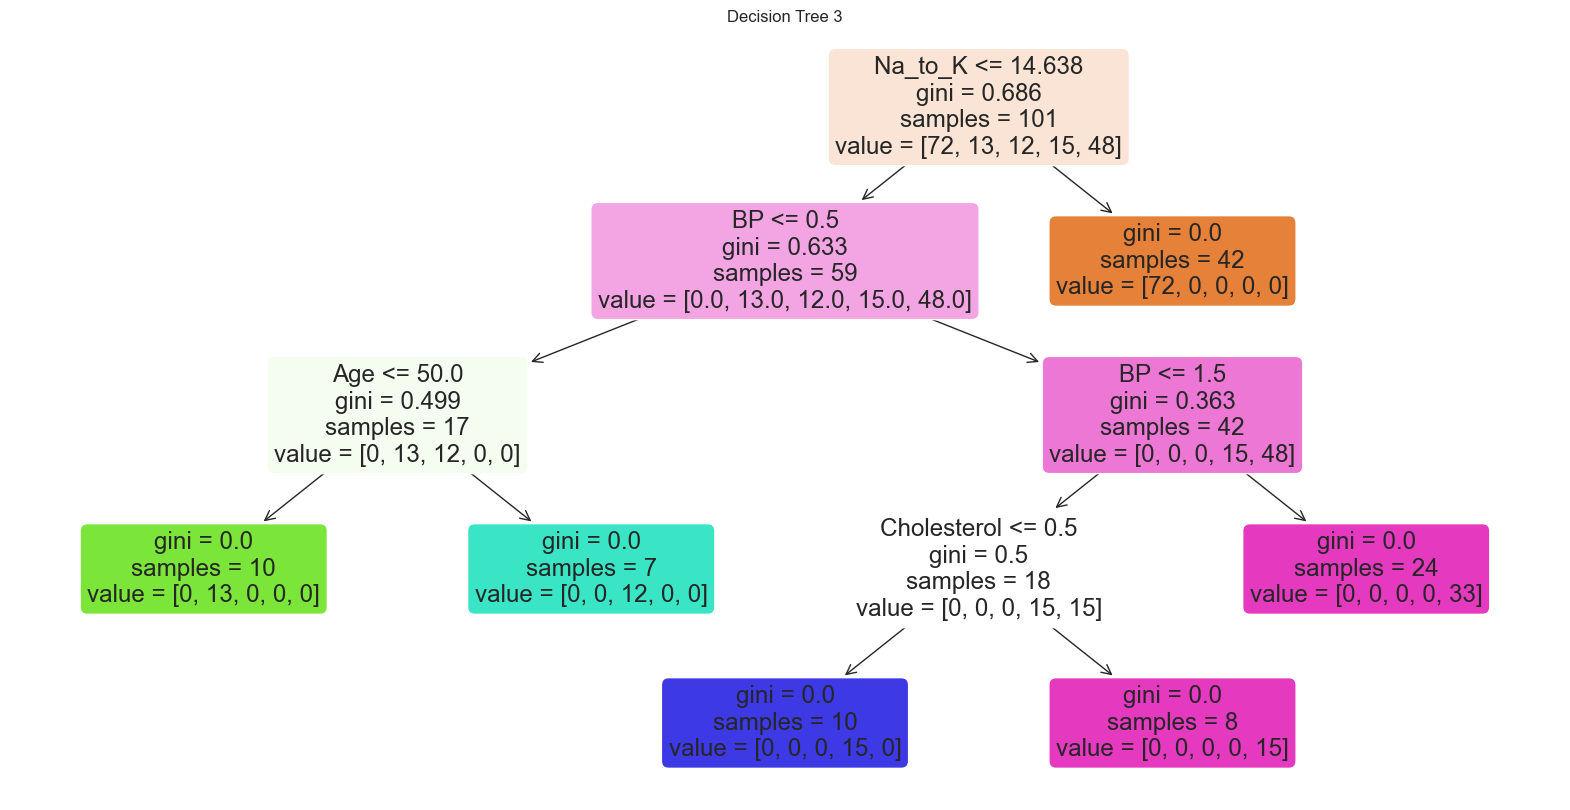

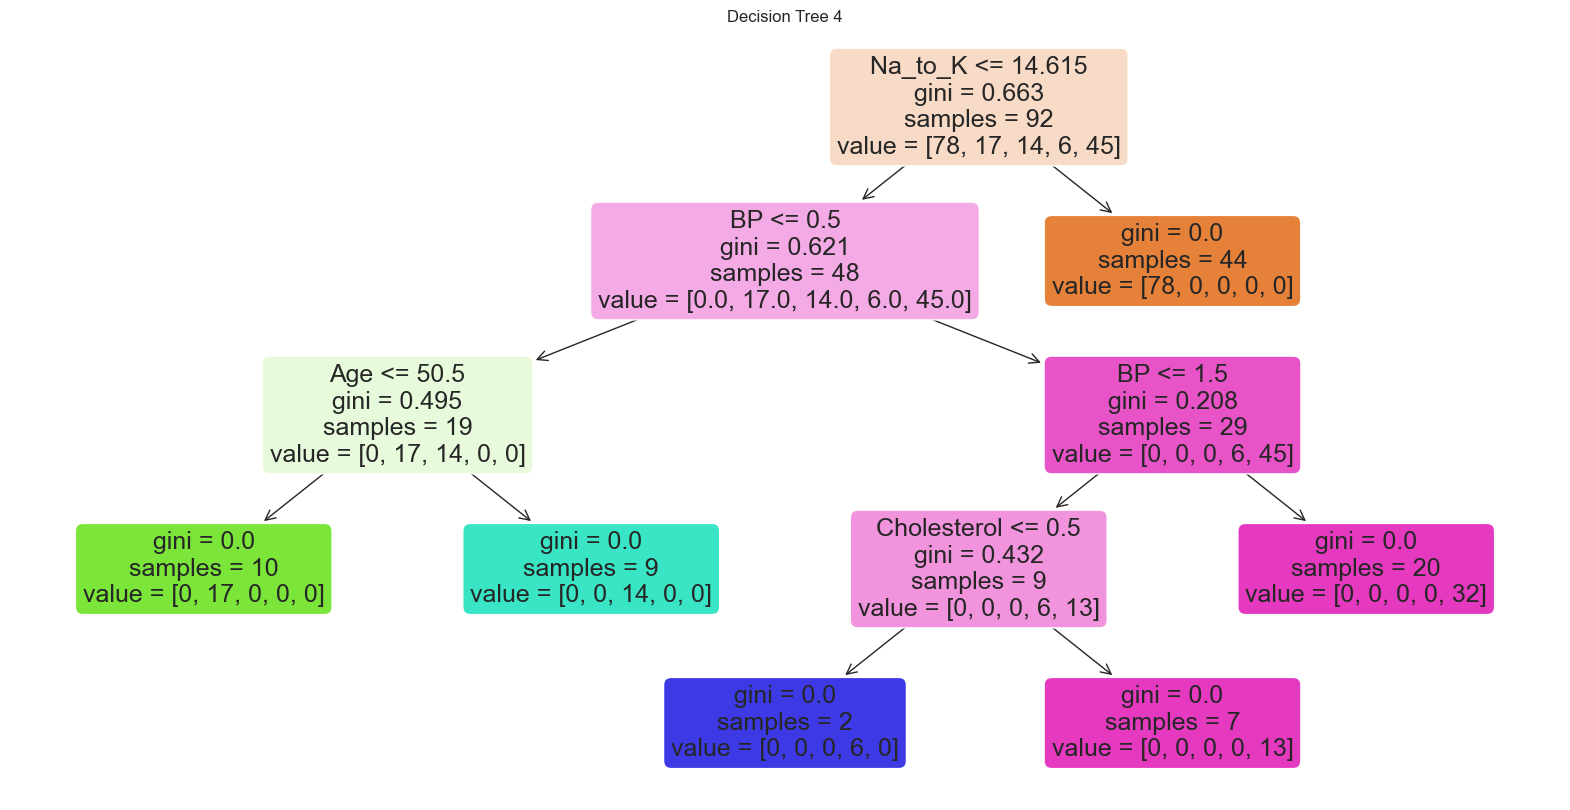

In [36]:
#for i in range(5):
 #   dot_data = export_graphviz(bc1.estimators_[i], out_file=None, 
             #               feature_names=list(X_train.columns),
              #              filled=True, rounded=True, special_characters=True)  
 #   graph = graphviz.Source(dot_data)
  #  display(graph)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


for i in range(5):
    estimator = bc1.estimators_[i]
    plt.figure(figsize=(20,10))
    plot_tree(estimator,
              feature_names=list(X_train.columns),
              filled=True,
              rounded=True)
    plt.title(f"Decision Tree {i}")
    plt.show()



In [37]:
bc1.score(X_test, y_test)

0.975

In [38]:
bc1_predictions = bc1.predict(X_test)
cm = confusion_matrix(y_test, bc1_predictions)
cm

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0, 10]])

In [39]:
def accuracy_score_for_types(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    types = np.unique(y_true)
    res = dict()
    for t in types:
        temp_data_flt = df[df['t']==t]
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        res[t] = temp_acc
    return res

def print_accuracy_score_for_types(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    accs = accuracy_score_for_types(y_true, y_pred)
    if len(accs)>0:
        print('Тип \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))
print_accuracy_score_for_types(y_test, bc1_predictions)

Тип 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0
3 	 1.0
4 	 0.9090909090909091


# Случайный лес

In [40]:
tree1 = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)
tree1.fit(X_train, y_train)

/Users/aleksej/Projects/tmo/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)

In [41]:
# Out-of-bag error, возвращаемый классификатором
tree1.oob_score_, 1-tree1.oob_score_

(0.8375, 0.16249999999999998)

In [42]:
tree1.oob_decision_function_[55:70]

array([[0.        , 0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.66666667, 0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.

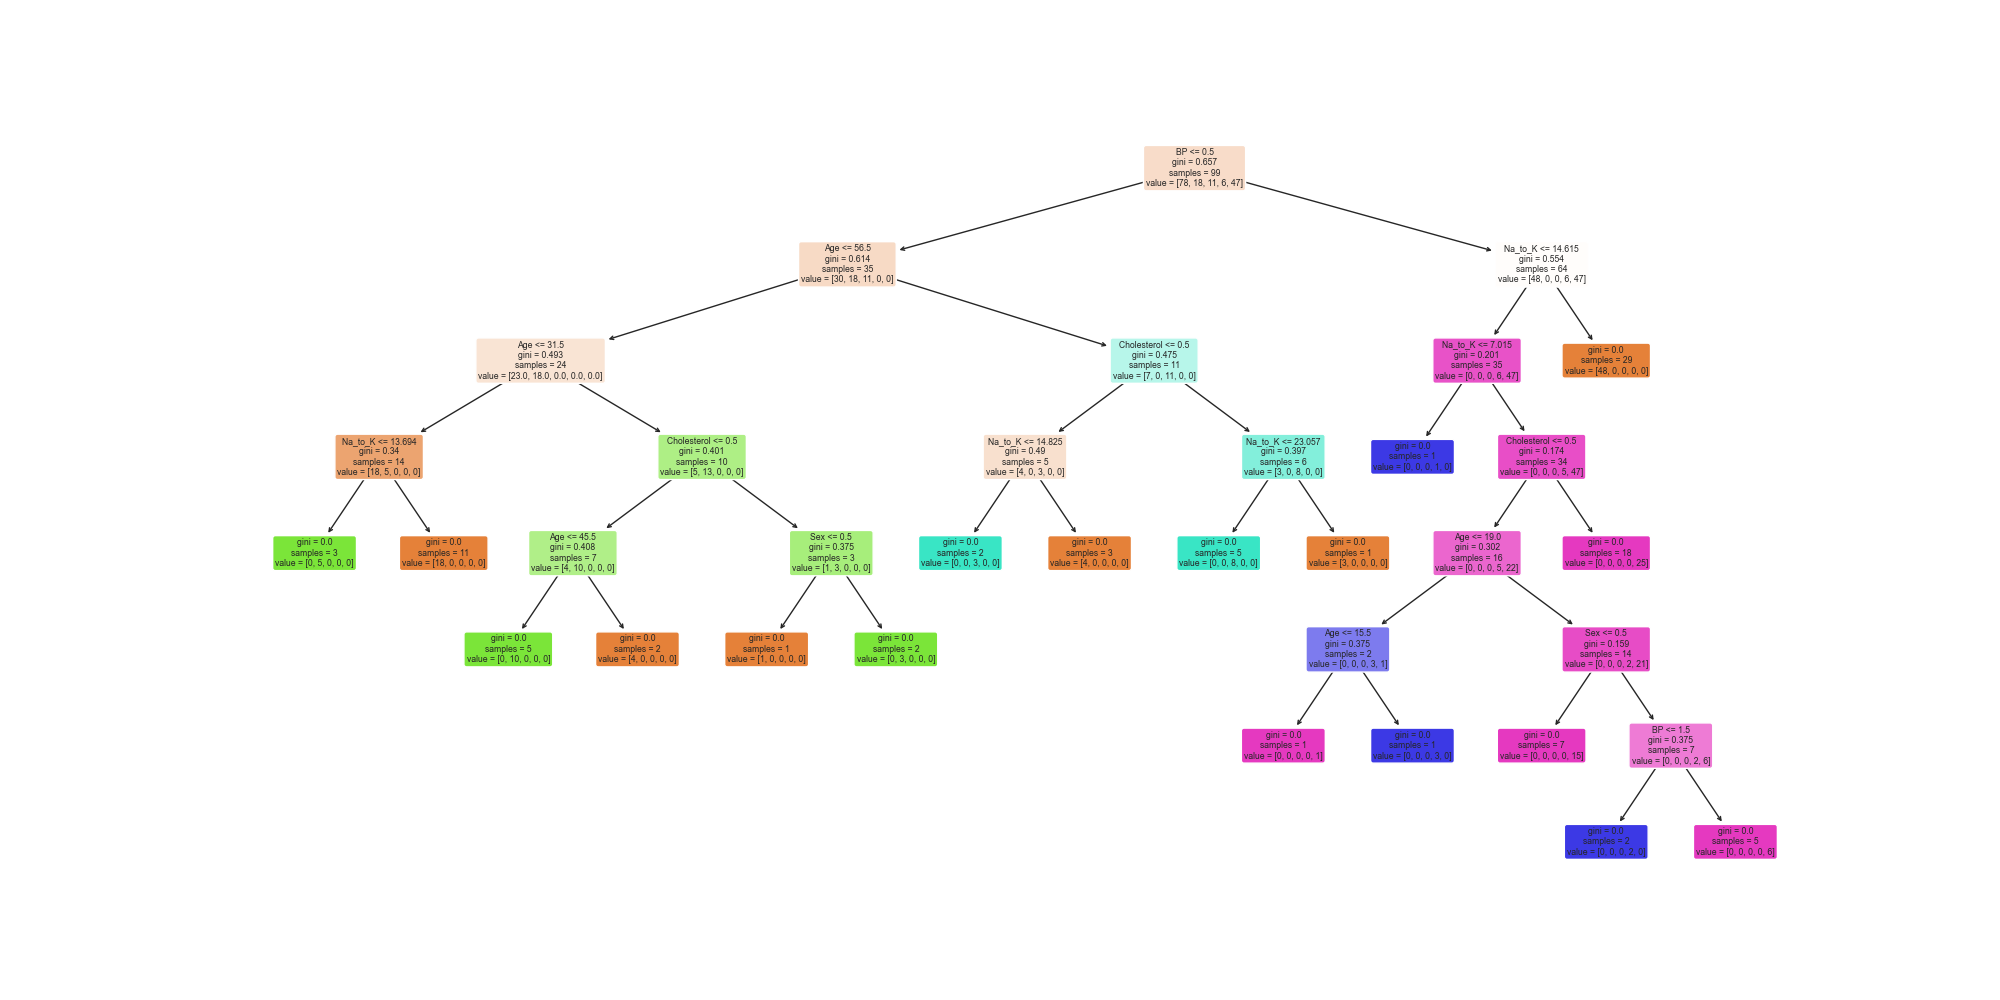

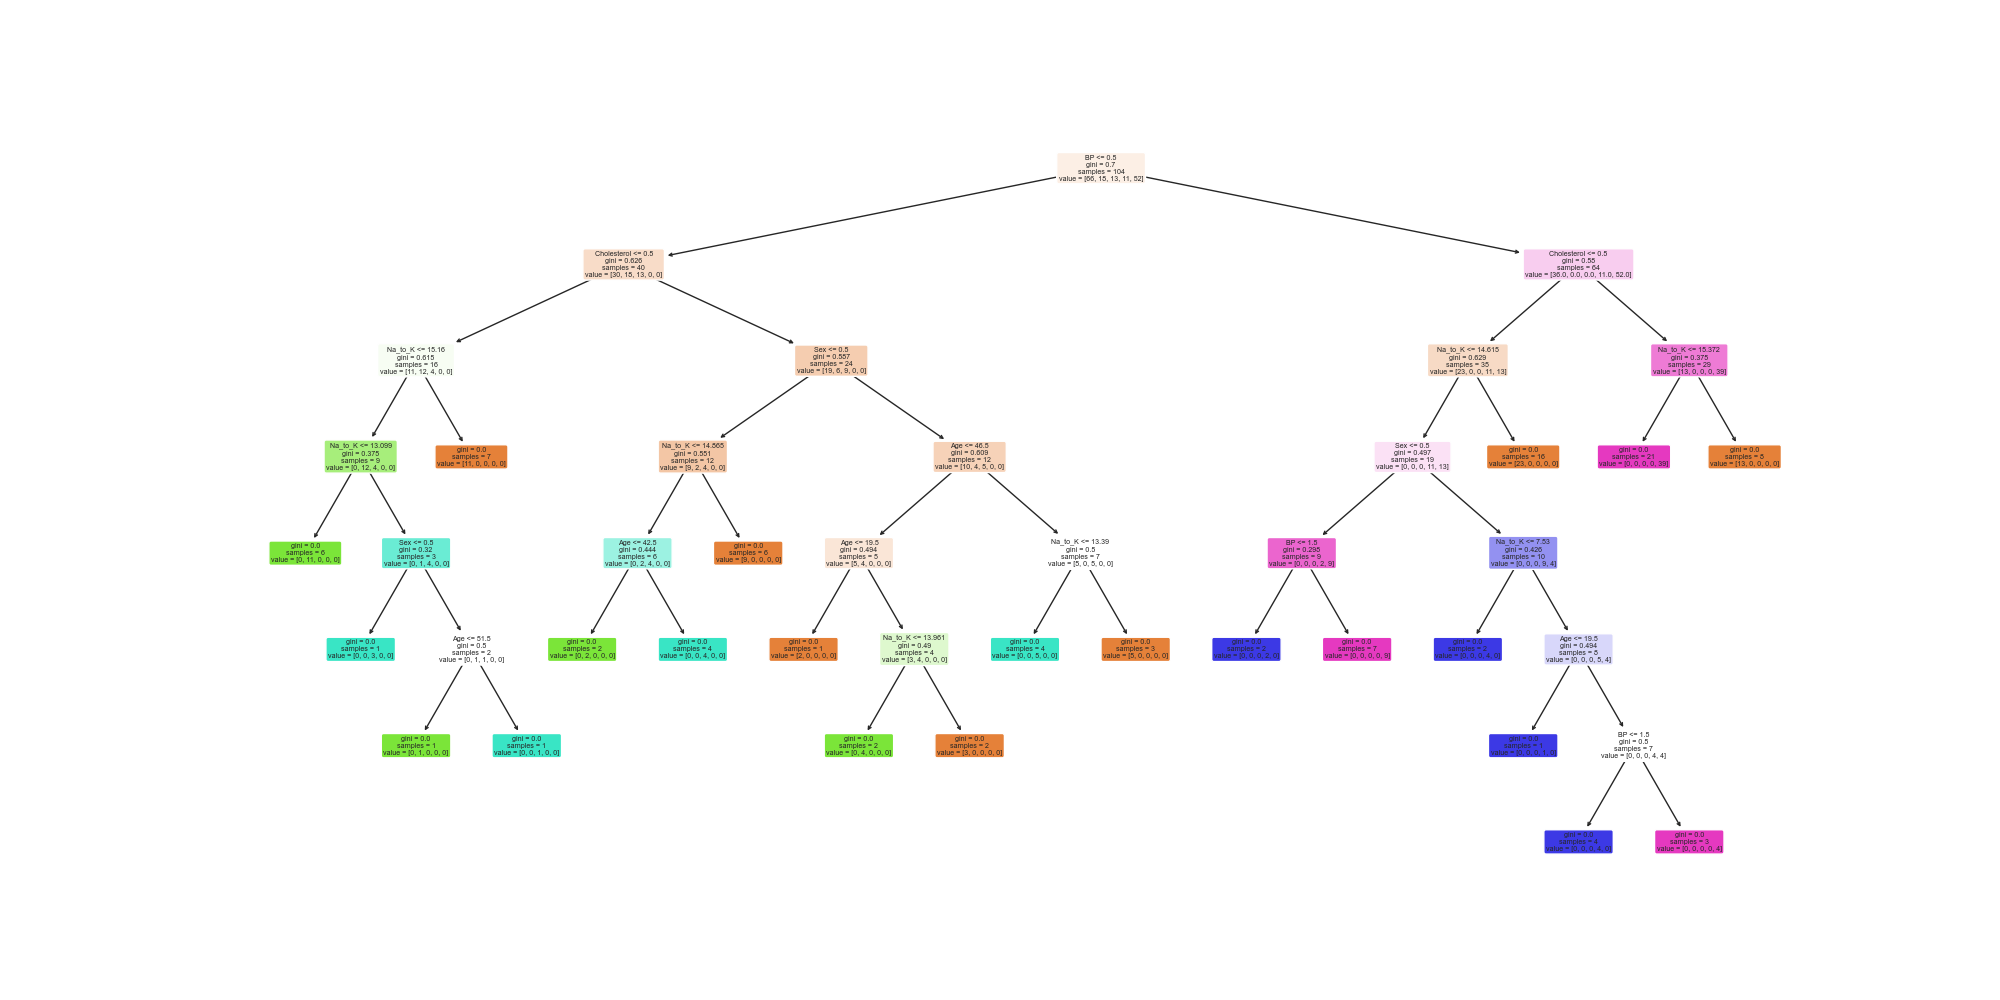

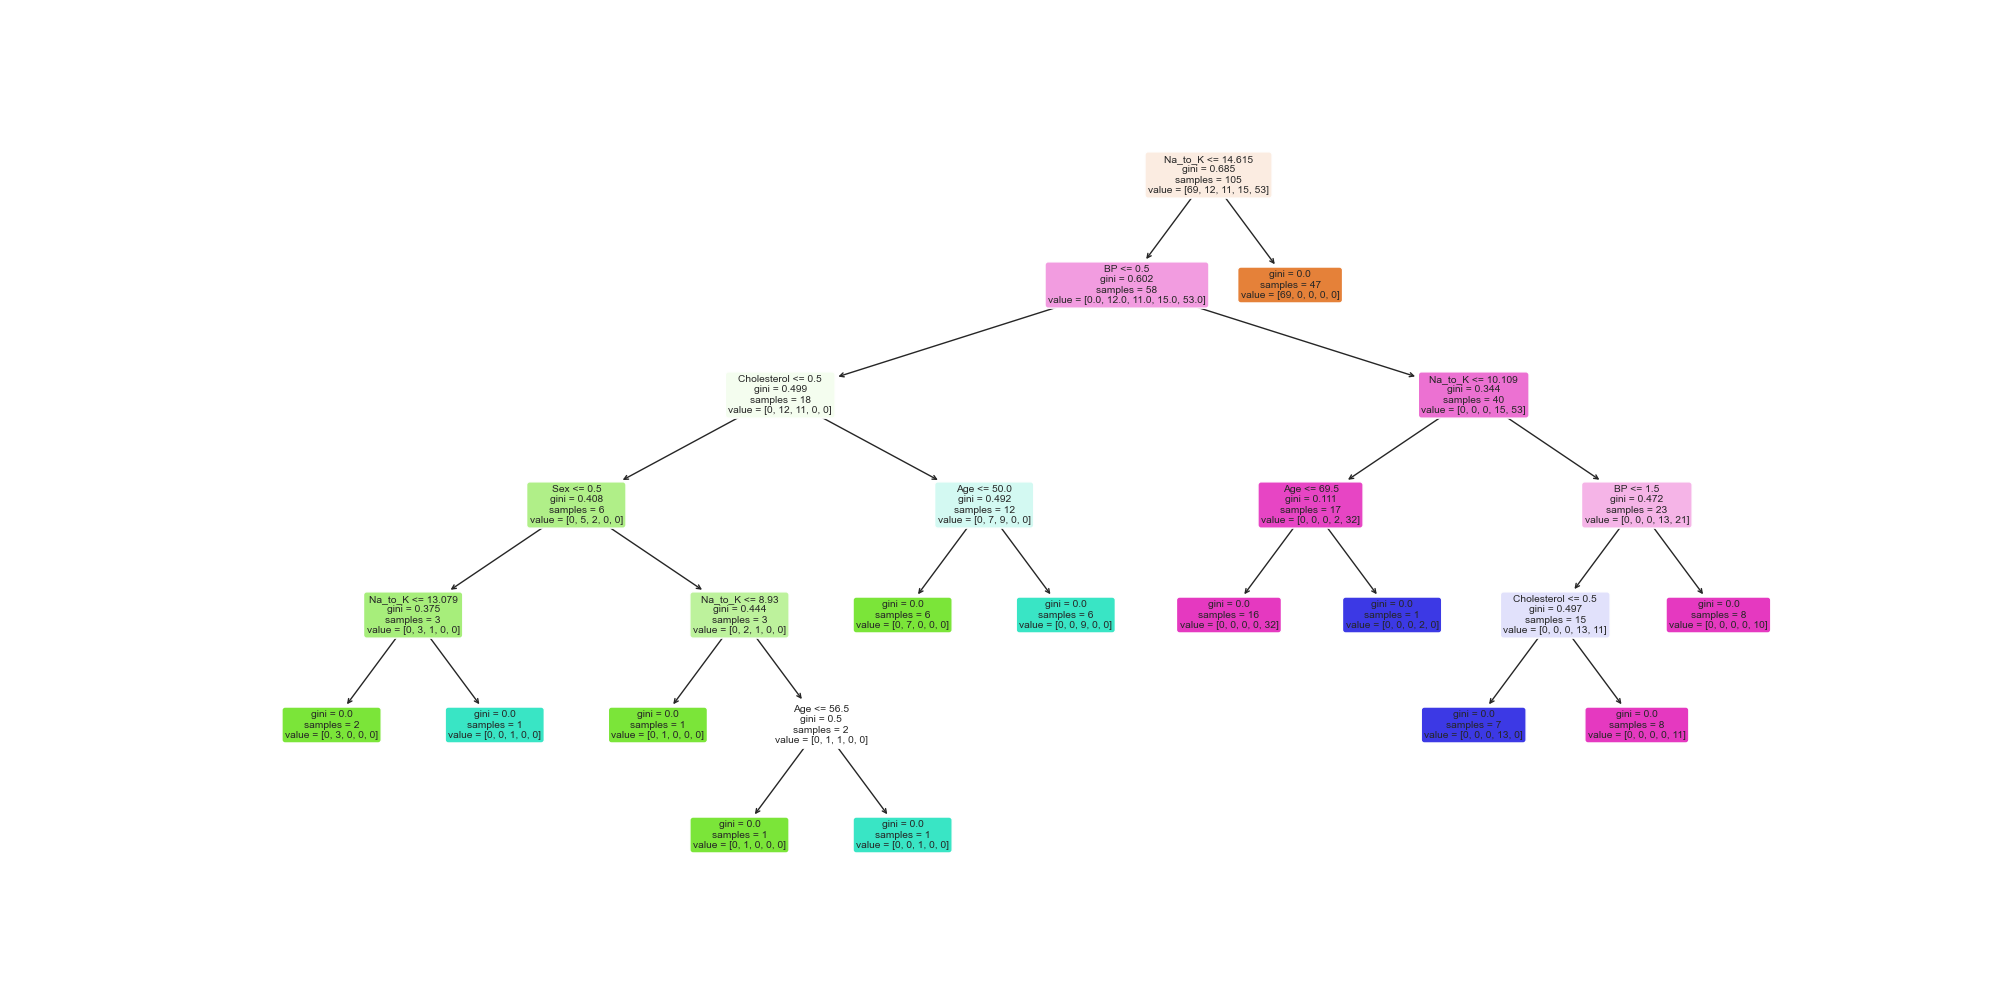

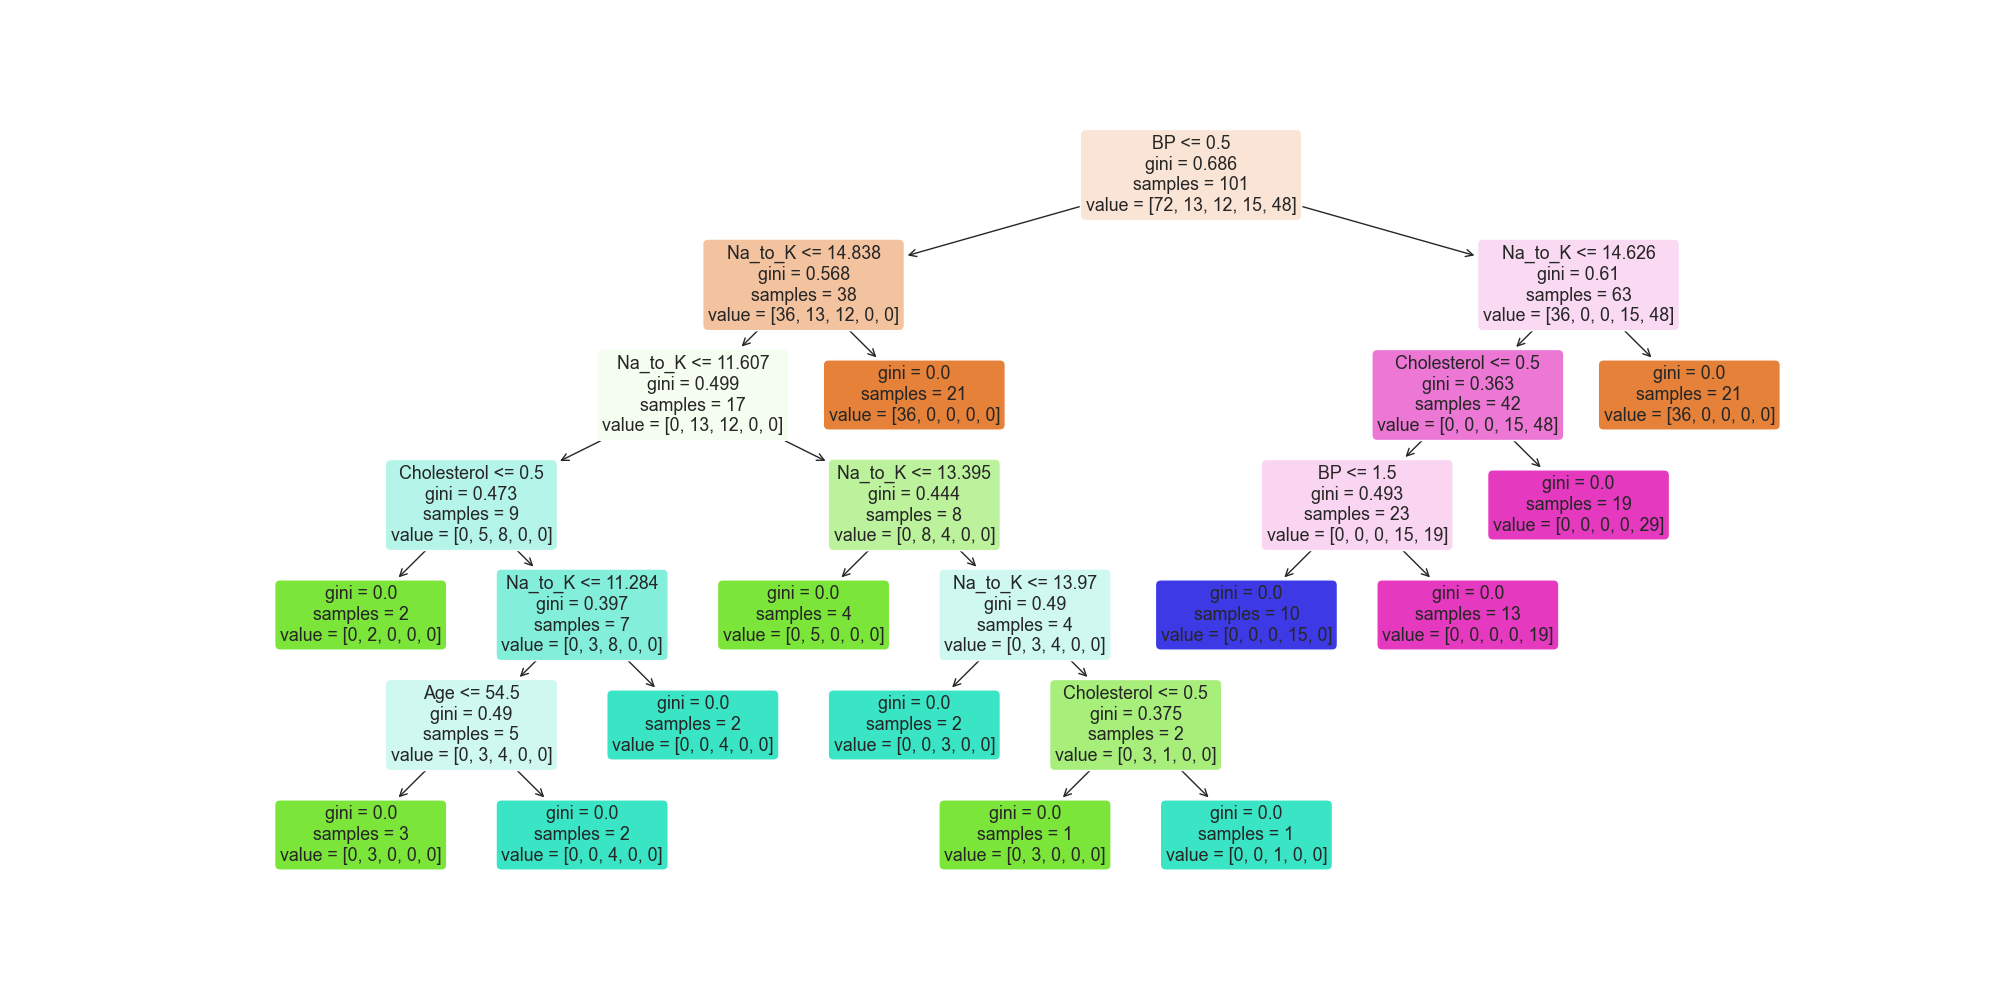

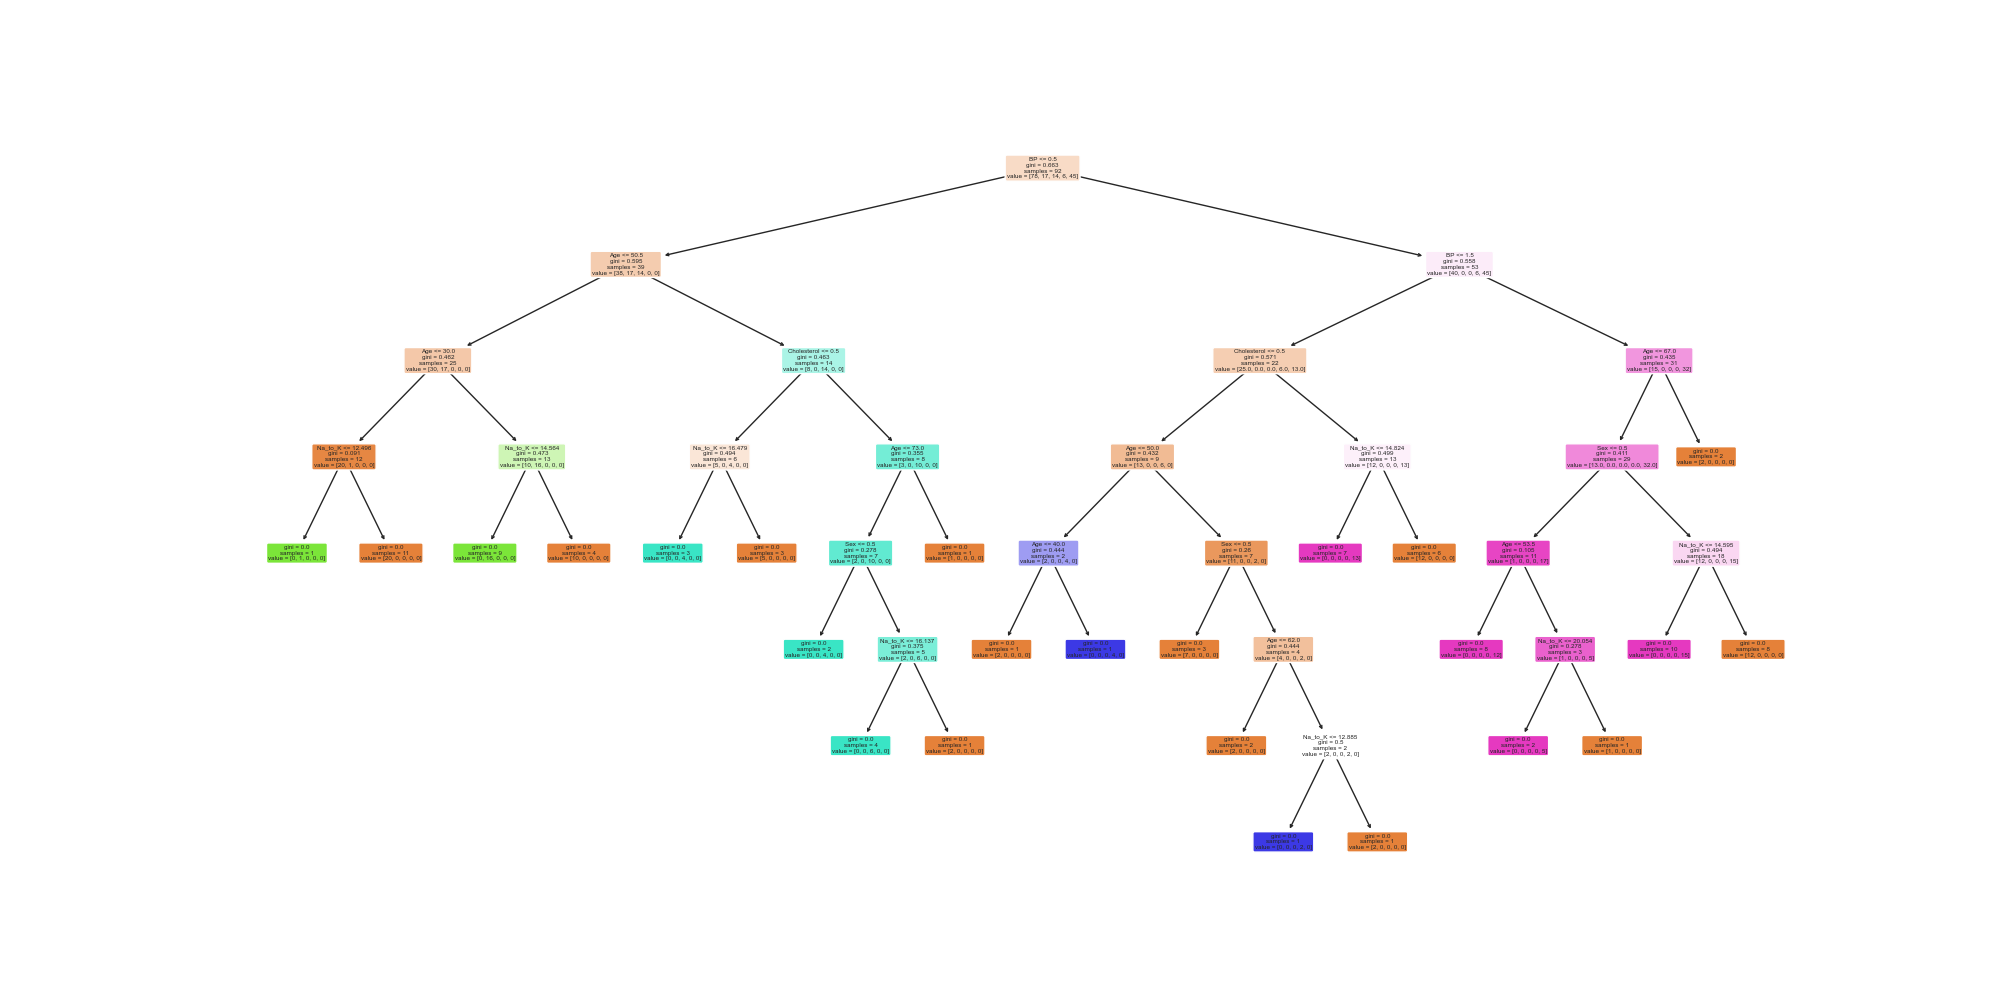

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from IPython.display import Image
import os

# Directory to save the images
output_dir = 'tree_images'
os.makedirs(output_dir, exist_ok=True)

for i in range(5):
    estimator = tree1.estimators_[i]
    
    # Create a new figure
    plt.figure(figsize=(20,10))
    
    # Plot the tree
    plot_tree(estimator,
              feature_names=list(X_train.columns),
              filled=True,
              rounded=True)
    
    # Save the plot as an image file
    image_path = os.path.join(output_dir, f"decision_tree_{i}.png")
    plt.savefig(image_path)
    
    # Close the plot to avoid display overflow in Jupyter notebooks
    plt.close()
    
    # Display the image
    display(Image(filename=image_path))


In [44]:
tree1.score(X_test, y_test)

0.95

In [45]:
tree1_predictions = tree1.predict(X_test)
cm = confusion_matrix(y_test, tree1_predictions)
cm

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  1,  2,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0, 10]])

In [46]:
print_accuracy_score_for_types(y_test, tree1_predictions)

Тип 	 Accuracy
0 	 1.0
1 	 1.0
2 	 0.6666666666666666
3 	 1.0
4 	 0.9090909090909091


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 


print("DecisionTree result:")
print(mean_absolute_error(y_test, bc1_predictions))
print(mean_squared_error(y_test, bc1_predictions))
print(r2_score(y_test, bc1_predictions))
print("\n")

print("RandomForest result:")
print(mean_absolute_error(y_test, tree1_predictions))
print(mean_squared_error(y_test, tree1_predictions))
print(r2_score(y_test, tree1_predictions))
print("\n")

DecisionTree result:
0.1
0.4
0.8639455782312926


RandomForest result:
0.125
0.425
0.8554421768707483



# Бустинг

In [48]:
ab1 = AdaBoostClassifier(n_estimators=5, algorithm='SAMME', random_state=10)
ab1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=5, random_state=10)

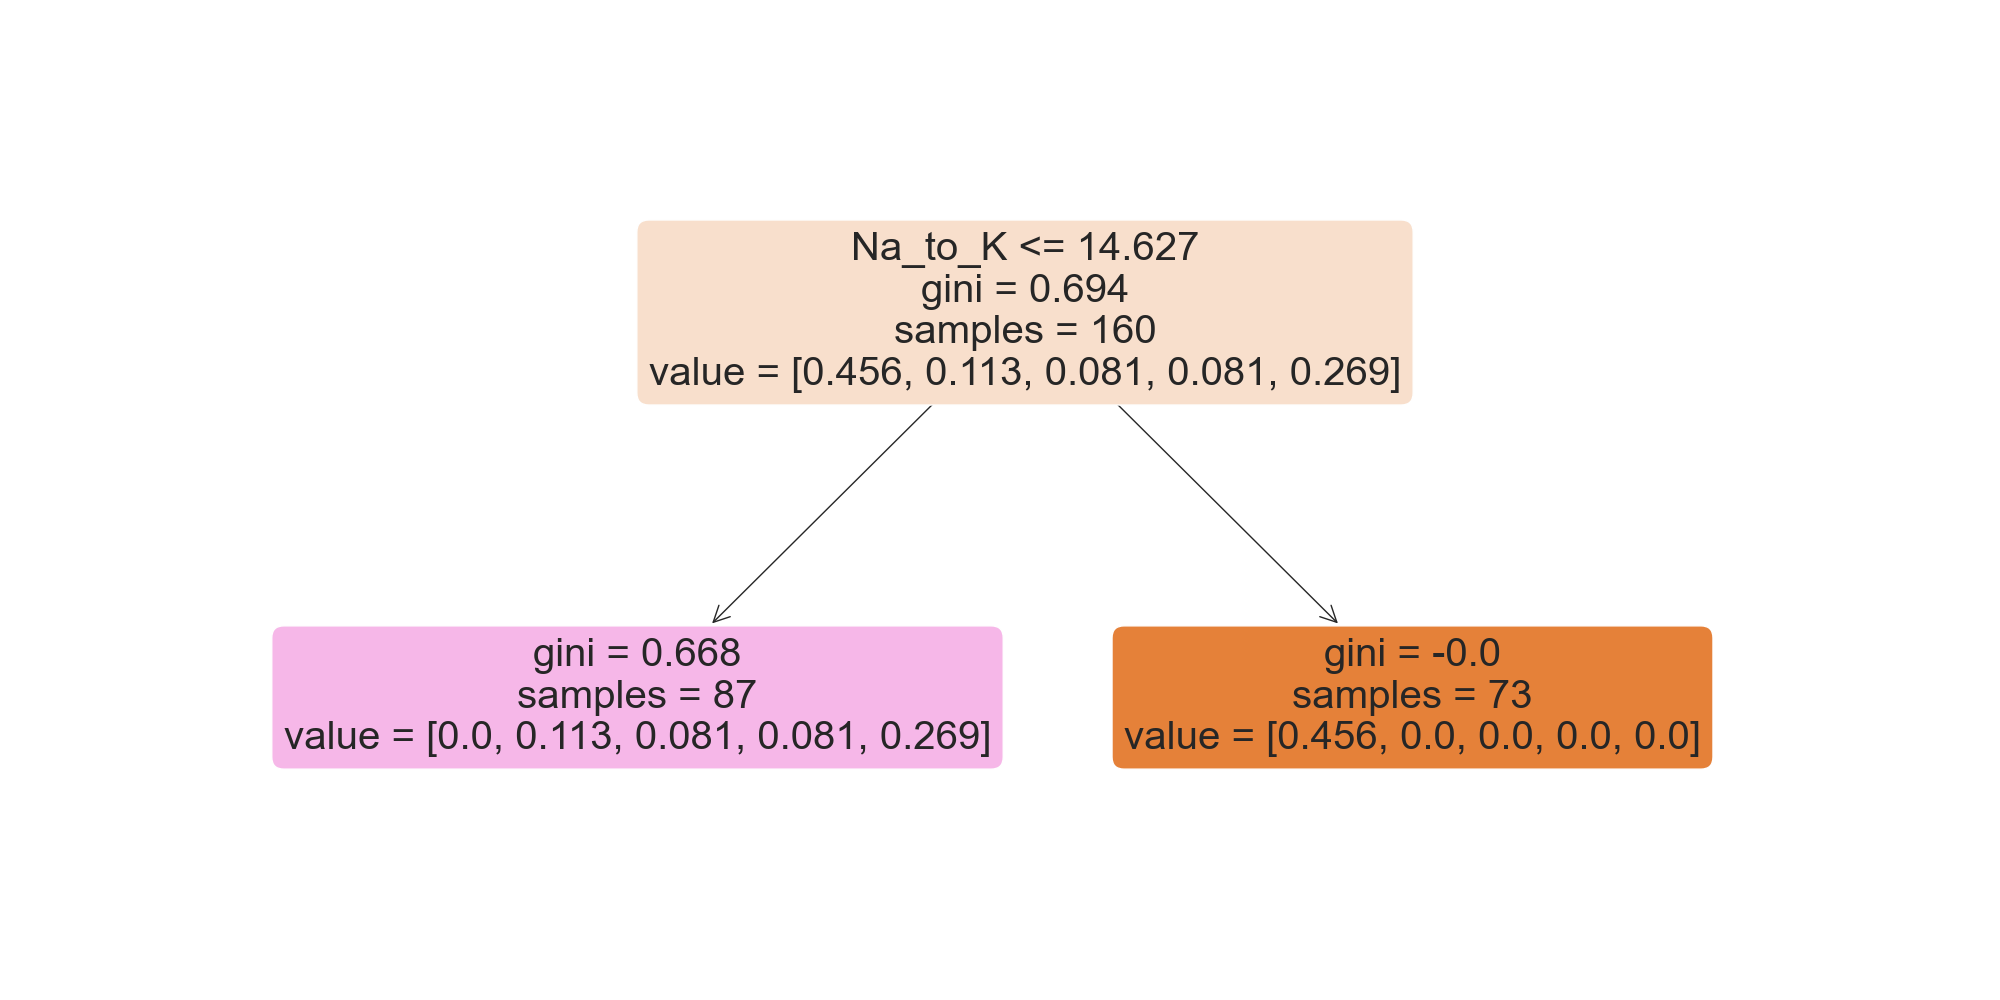

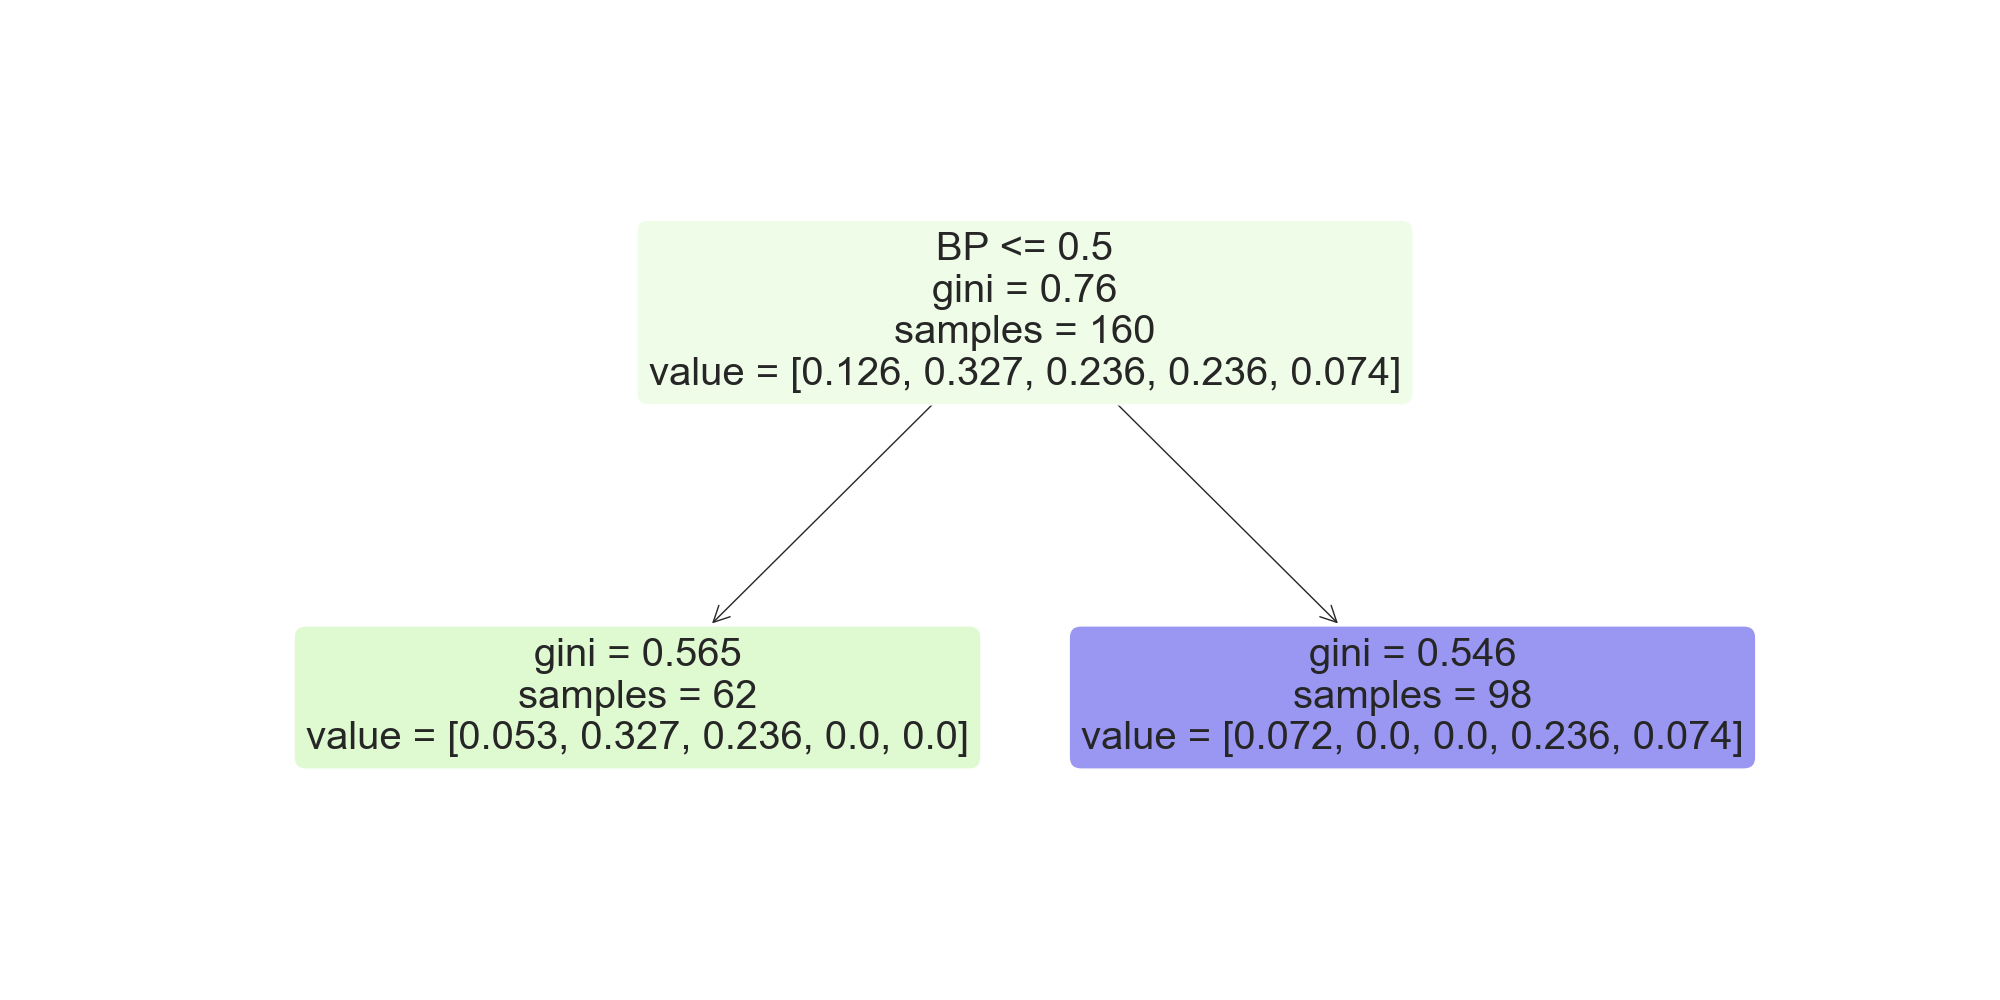

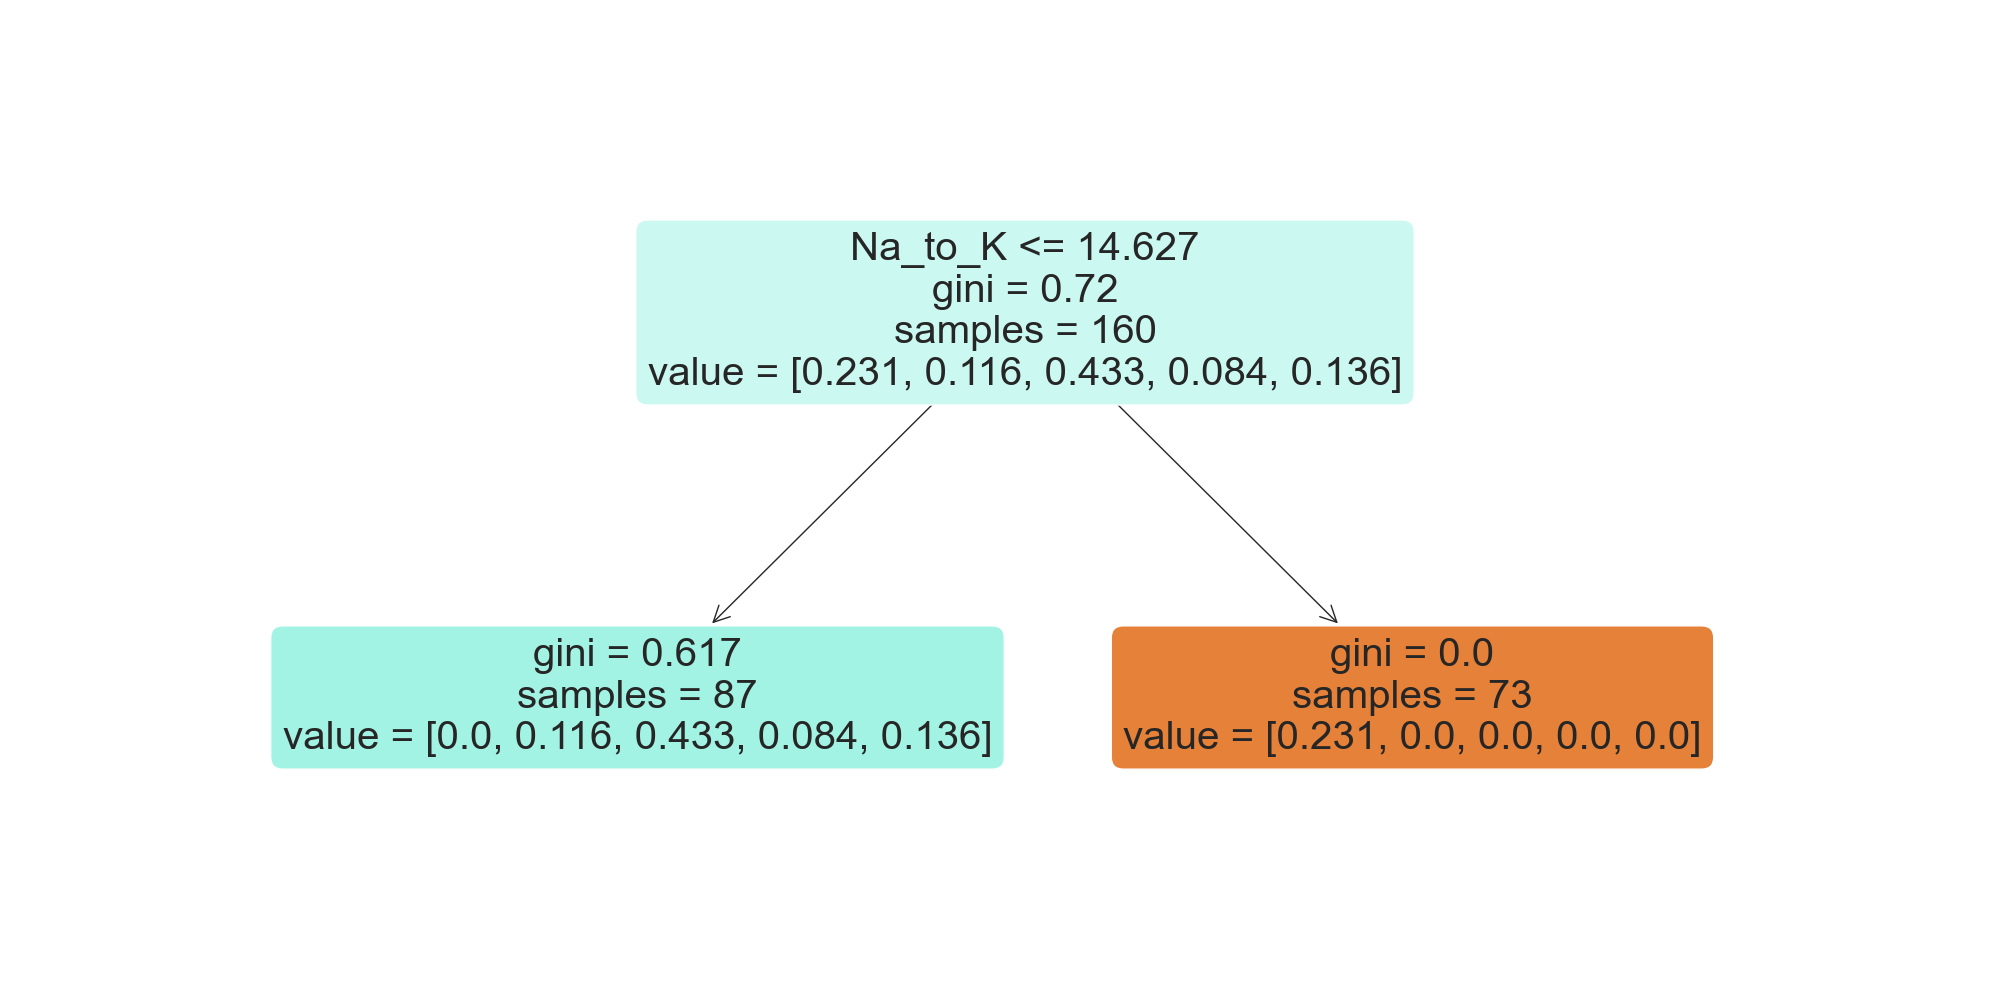

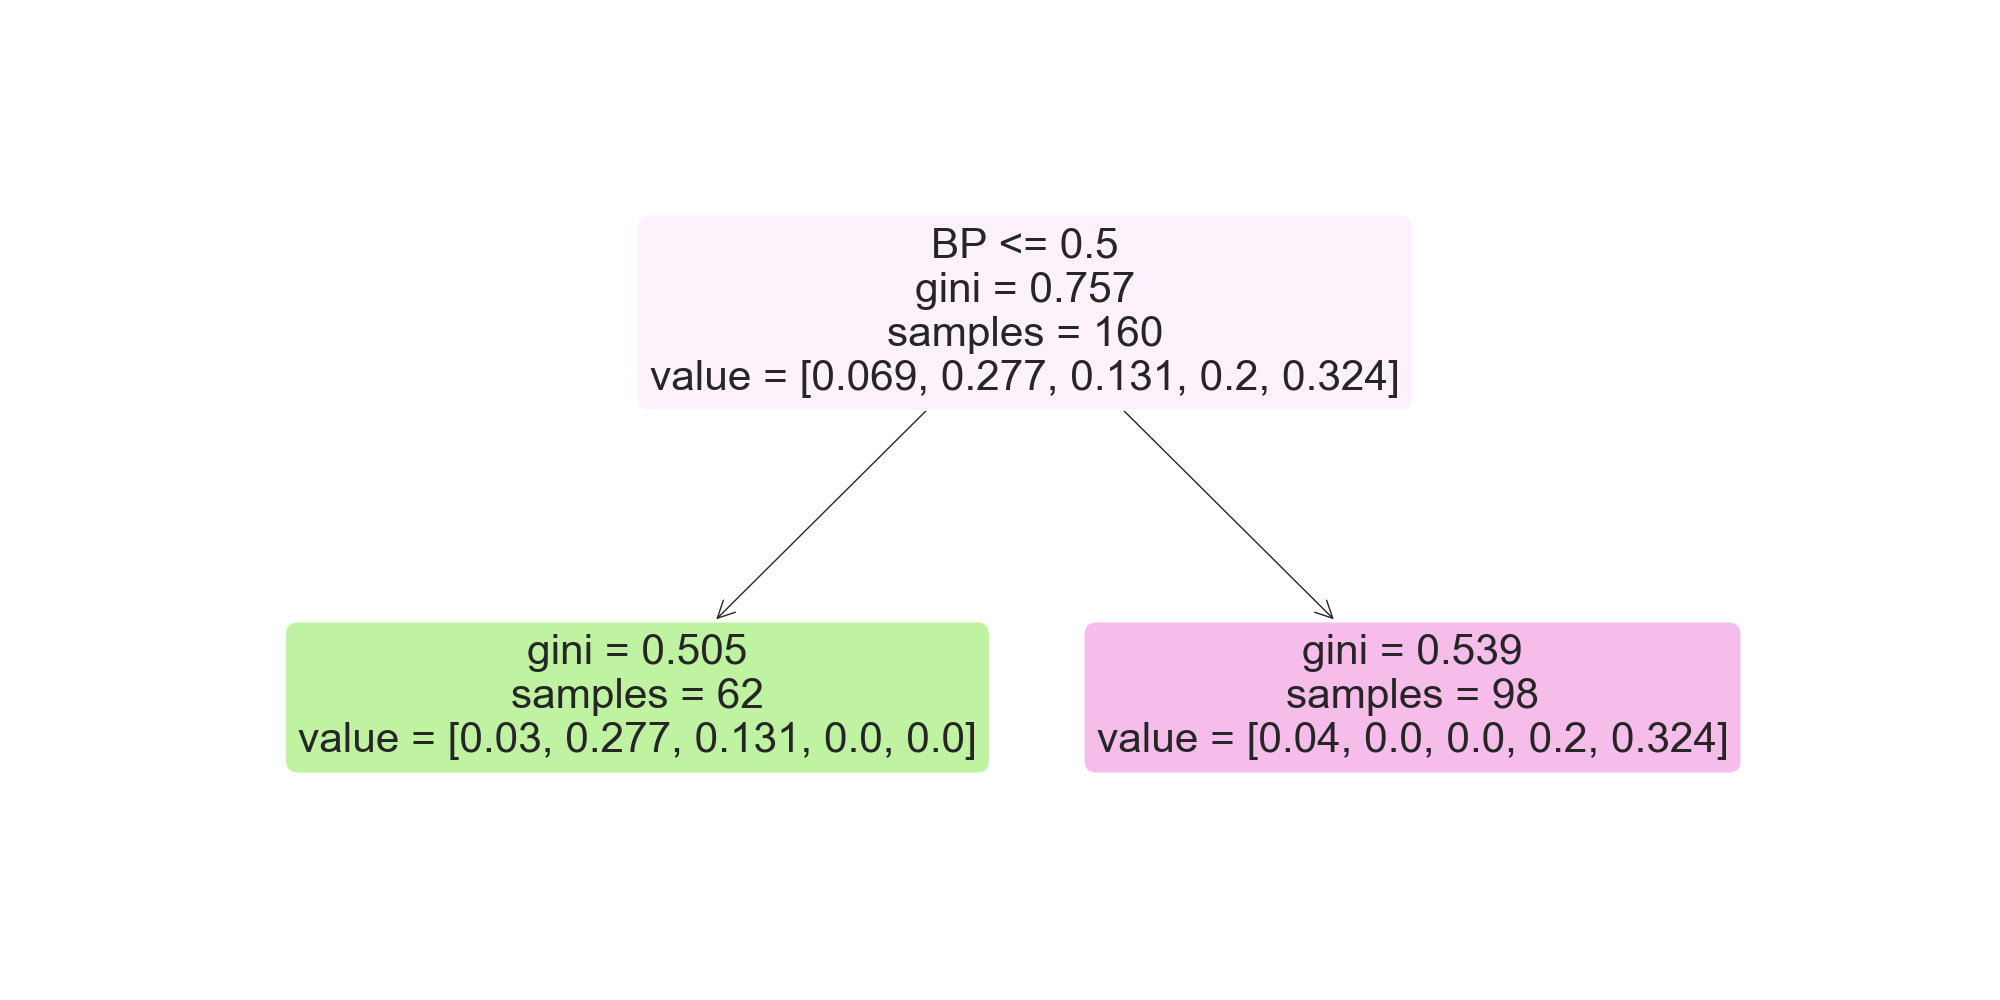

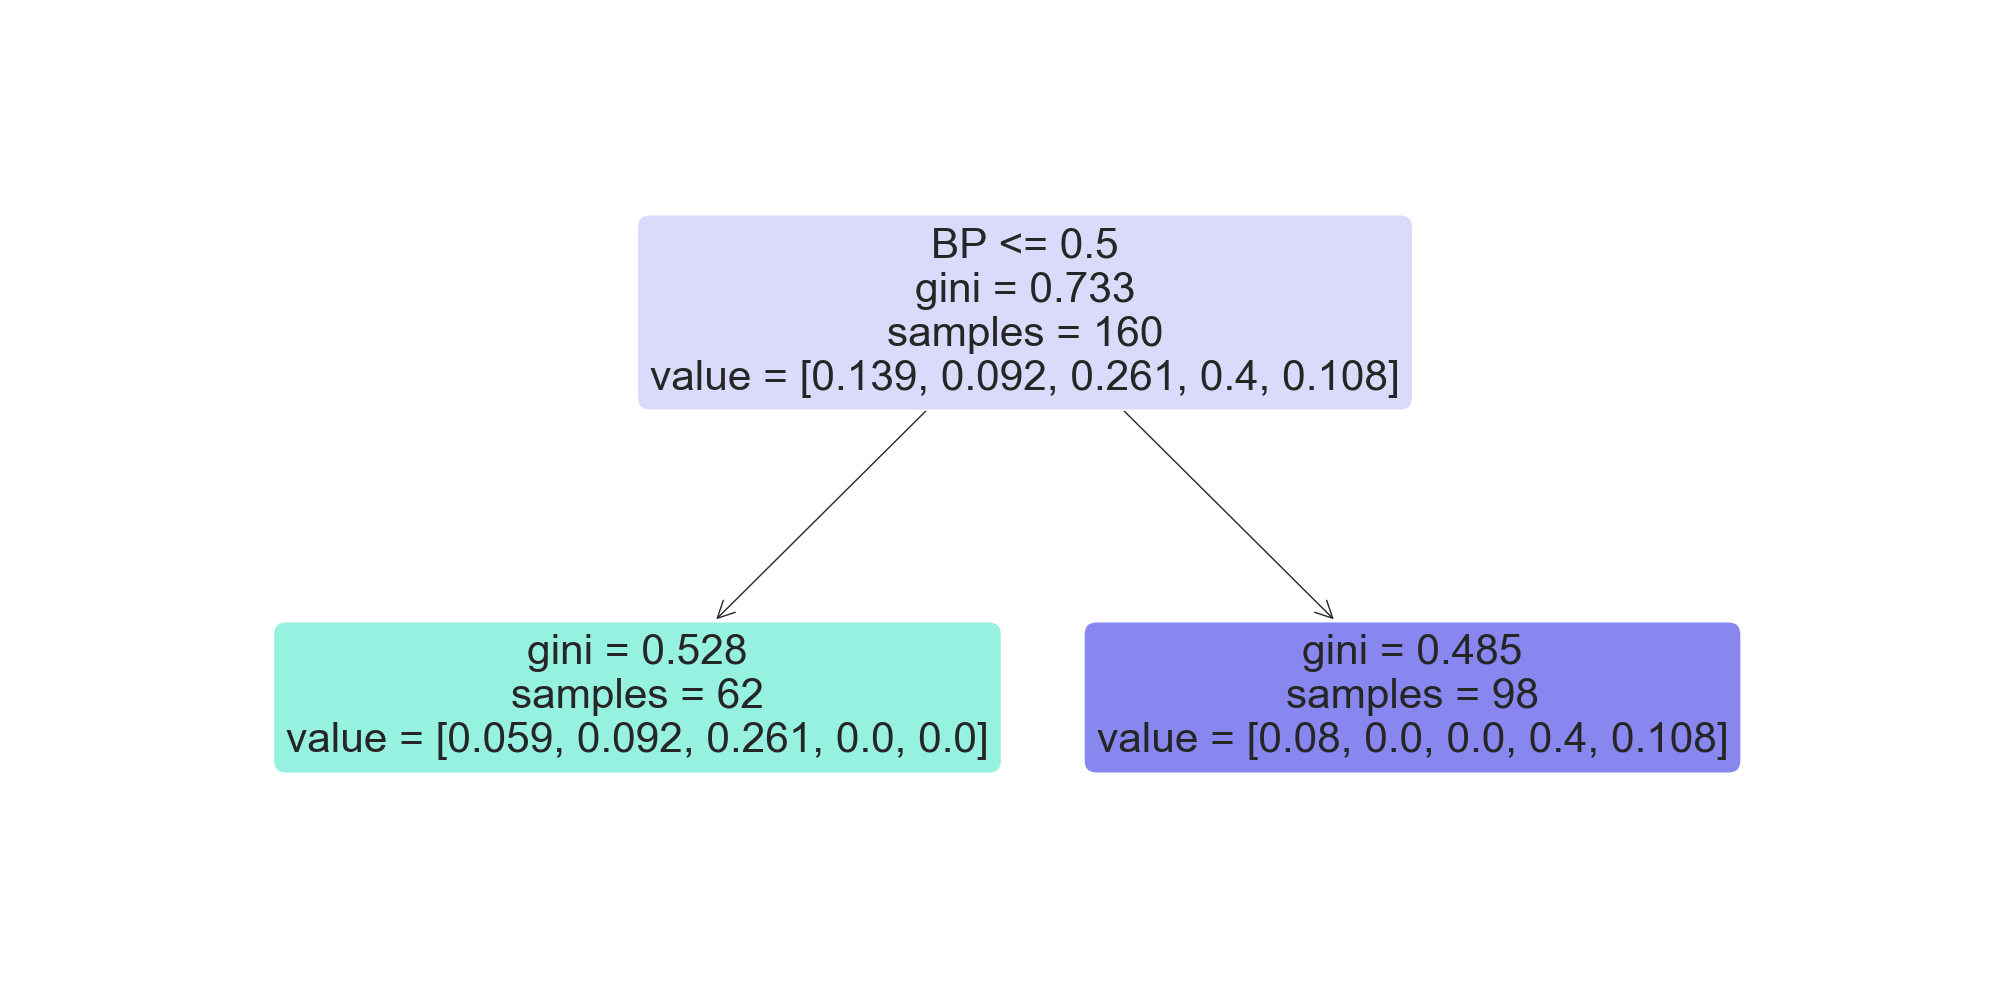

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from IPython.display import Image
import os

# Directory to save the images
output_dir = 'tree_images'
os.makedirs(output_dir, exist_ok=True)

for i in range(5):
    estimator = ab1.estimators_[i]
    
    # Create a new figure
    plt.figure(figsize=(20,10))
    
    # Plot the tree
    plot_tree(estimator,
              feature_names=list(X_train.columns),
              filled=True,
              rounded=True)
    
    # Save the plot as an image file
    image_path = os.path.join(output_dir, f"decision_tree_{i}.png")
    plt.savefig(image_path)
    
    # Close the plot to avoid display overflow in Jupyter notebooks
    plt.close()
    
    # Display the image
    display(Image(filename=image_path))


In [50]:
# Веса деревьев в ансамбле соответствуют параметру alpha_t:
ab1.estimator_weights_

array([2.35569492, 1.64222774, 2.06782601, 1.79284037, 2.05370163])

In [51]:
df1 = ab1.decision_function(X_train)
df1.shape
df1[:10]

array([[-0.25      ,  0.18318293,  0.26974964, -0.25      ,  0.04706742],
       [-0.25      , -0.25      ,  0.01076541,  0.21607912,  0.27315547],
       [ 0.30783283, -0.25      , -0.25      ,  0.21607912, -0.02391195],
       [-0.25      , -0.25      ,  0.01076541,  0.21607912,  0.27315547],
       [-0.25      ,  0.18318293,  0.26974964, -0.25      ,  0.04706742],
       [ 0.30783283, -0.25      , -0.25      ,  0.21607912, -0.02391195],
       [-0.25      , -0.25      ,  0.01076541,  0.21607912,  0.27315547],
       [-0.25      , -0.25      ,  0.01076541,  0.21607912,  0.27315547],
       [-0.25      ,  0.18318293,  0.26974964, -0.25      ,  0.04706742],
       [ 0.30783283, -0.25      , -0.25      ,  0.21607912, -0.02391195]])

In [52]:
ab1.score(X_test, y_test)


0.775

In [53]:
ab1_predictions = ab1.predict(X_test)

# Градиентный бустинг

In [54]:
gb_cl = GradientBoostingClassifier(random_state=1)
gb_cl.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [55]:
gb_cl.score(X_test, y_test)

0.975

In [56]:
gb_cl_predictions = gb_cl.predict(X_test)

In [57]:
# Сравнение эффективностей
model = [ab1, gb_cl]
model_names = ["AdaBoost", "GradientBoosting"]

print("AdaBoost result:")
print(mean_absolute_error(y_test, ab1_predictions))
print(mean_squared_error(y_test, ab1_predictions))
print(r2_score(y_test, ab1_predictions))
print("\n")

print("RandomForest result:")
print(mean_absolute_error(y_test, gb_cl_predictions))
print(mean_squared_error(y_test, gb_cl_predictions))
print(r2_score(y_test, gb_cl_predictions))
print("\n")

AdaBoost result:
0.3
0.6
0.7959183673469388


RandomForest result:
0.1
0.4
0.8639455782312926

